<img src='https://www.researchgate.net/publication/339651408/figure/fig3/AS:864987794907143@1583240569937/The-actor-critic-proximal-policy-optimization-Actor-Critic-PPO-algorithm-process.ppm'>

In [1]:
%load_ext autoreload
%autoreload 2

from os.path import join

from policy_gradient.ppo import PPOAgent

In [2]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [3]:
agent = PPOAgent(
        config=dict(
#             env_or_env_name="LunarLanderContinuous-v2",
            env_or_env_name="CartPole-v1",
            
            logdir=join("Experiments", "ppo_cartpole"),
            use_tensorboard=False,
            explore=True,
            clip_value=0.2,
            gamma=0.99,
            num_iter=100,
            num_epochs=20,
            train_batch_size=4000,
            sgd_minibatch_size=128,
            num_dim_actor=(32, 32),
            act_f_actor="tanh",
            num_dim_critic=(32, 32),
            act_f_critic="tanh",
            entropy_coeff=1e-3,
            lr=0.0025,
            vf_loss_coeff=1.0,
            vf_clip_param=10.0,
            clip_gradients_by_norm=None,
            use_critic=True,
            use_gae=True,
            gae_lambda=1.0,
            standardize_advantages=True,
        )
    )

history = {}

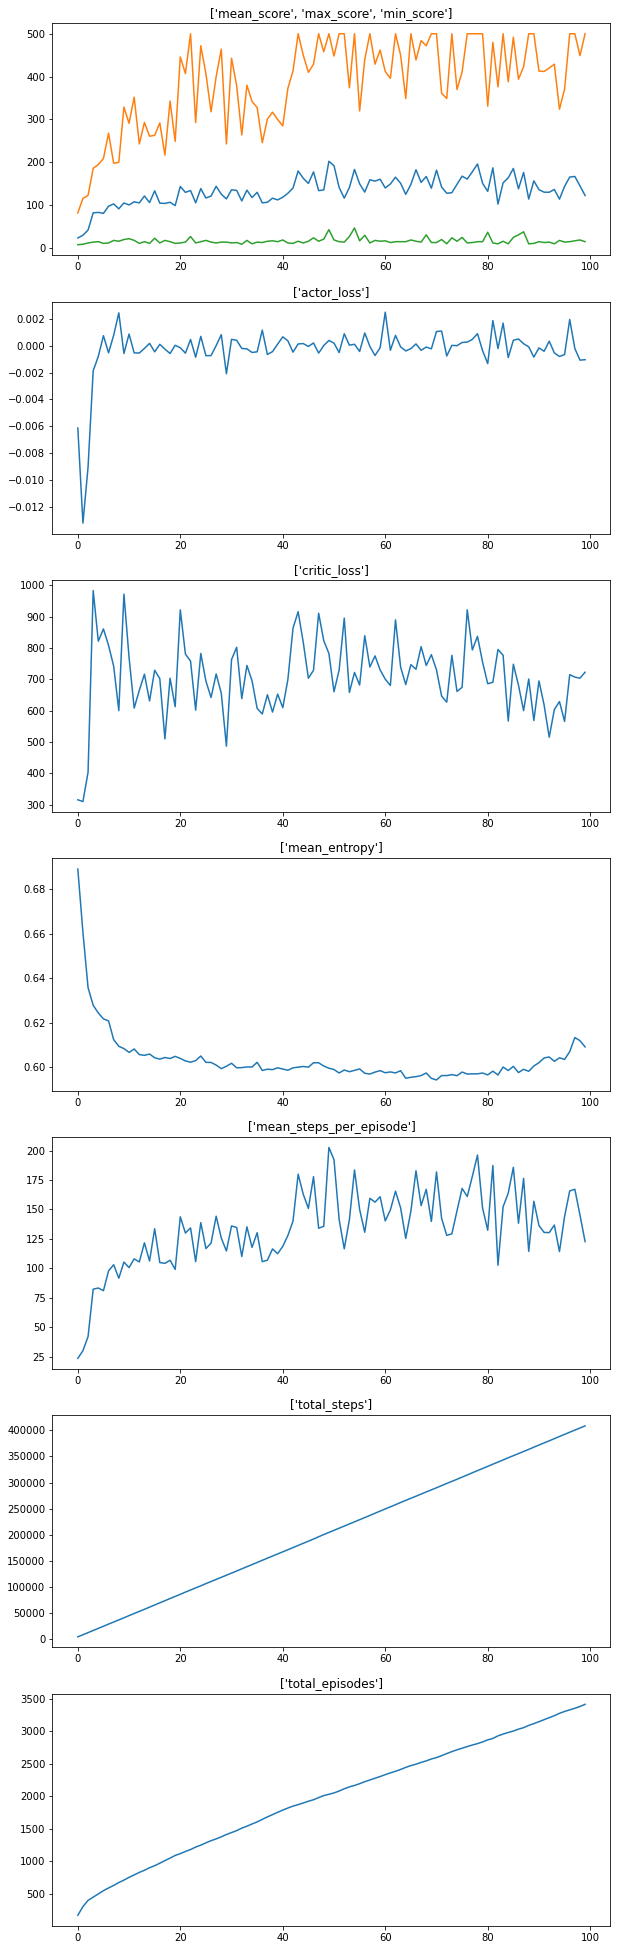

In [4]:
history = agent.run(
    plot_stats=[
        ['mean_score',
        'max_score',
        'min_score',],
        'actor_loss',
        'critic_loss',
        'mean_entropy',
        'mean_steps_per_episode',
        'total_steps',
        'total_episodes',
    ],
    history=history,
    plot_period=1,
)


In [5]:
agent = PPOAgent(
        config=dict(
            env_or_env_name="LunarLanderContinuous-v2",
#             env_or_env_name="CartPole-v1",
            
            logdir=join("Experiments", "ppo_lunarlander"),
            use_tensorboard=False,
            explore=True,
            clip_value=0.2,
            gamma=0.99,
            num_iter=1000,
            num_epochs=20,
            train_batch_size=4000,
            sgd_minibatch_size=128,
            num_dim_actor=(64, 64, 128),
            act_f_actor="tanh",
            num_dim_critic=(64, 64, 128),
            act_f_critic="relu",
            entropy_coeff=1e-3,
            lr=0.00025,
            vf_loss_coeff=1.0,
            vf_clip_param=10.0,
            clip_gradients_by_norm=0.5,
            use_critic=True,
            use_gae=True,
            gae_lambda=1.0,
            standardize_advantages=True,
        )
    )

history = {}

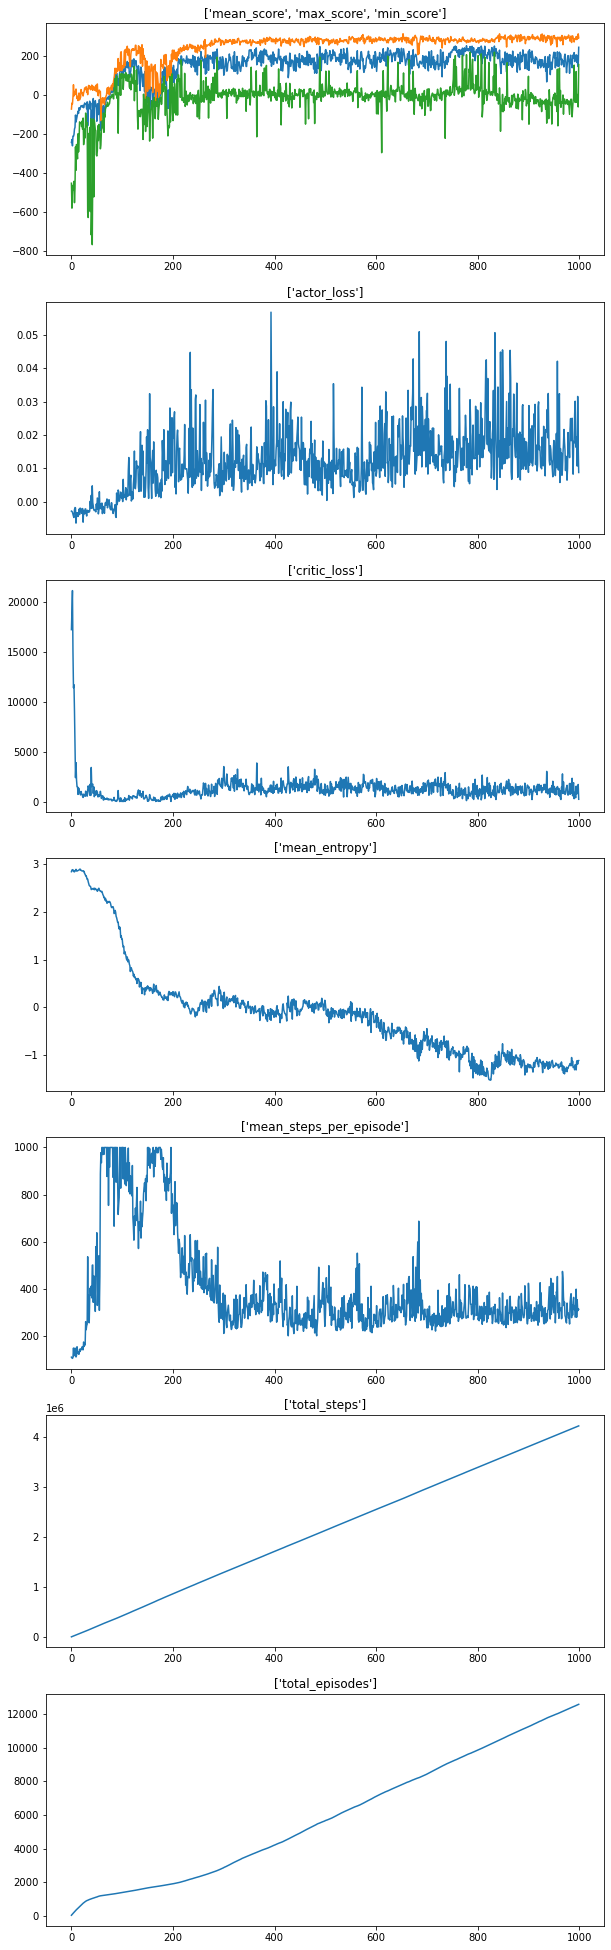

In [6]:
history = agent.run(
    plot_stats=[
        ['mean_score',
        'max_score',
        'min_score',],
        'actor_loss',
        'critic_loss',
        'mean_entropy',
        'mean_steps_per_episode',
        'total_steps',
        'total_episodes',
    ],
    history=history,
    plot_period=1,
)


In [10]:
from IPython.display import Video
import os

from gym.wrappers import Monitor
from policy_gradient.ppo import run_episode
video_path = join(join("Experiments", "ppo_lunarlander"), 'video')
eval_env = Monitor(
    agent.env,
    video_path,
    video_callable=lambda x: True,
    force=True,
)

run_episode(eval_env, agent)

# take the last element in the folder with .mp4 extension
video_name = [x for x in os.listdir(video_path) if '.mp4' in x][-1]
Video(os.path.join(video_path, video_name))